xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]
xlabel [-0.05, -0.025, 0.0, 0.02500000000000001, 0.05]


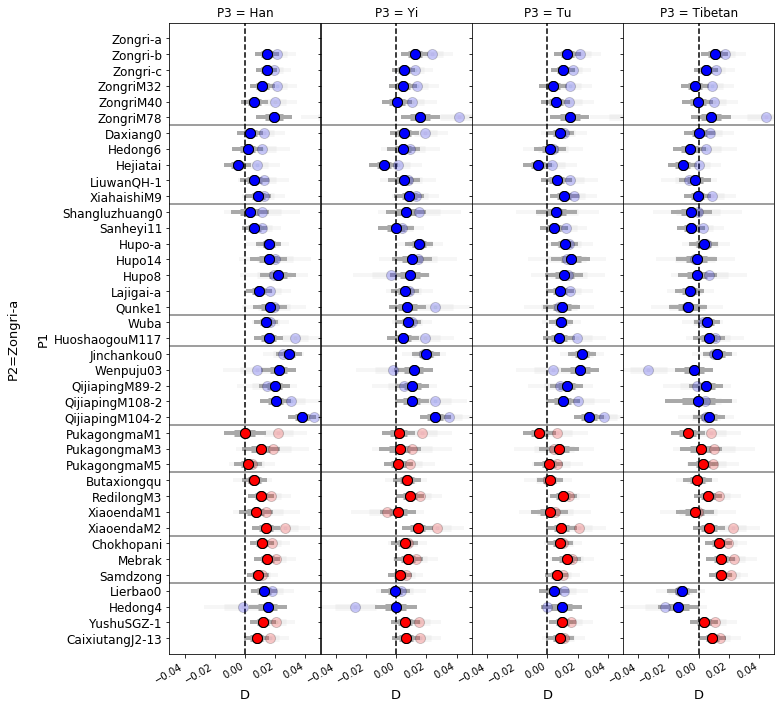

In [5]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13",
      ][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=atib
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.05]*len(mycombo)
myxmax=[0.05]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(11,10))

mynames=mycombo
myind="Zongri-a"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Han","Yi","Tu","Tibetan"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(1,3),(0,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[ypops,myind,[varypop],out]

    Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
    Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
    Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
    mylabel="P3 = %s" % mypops2[2][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("P2=%s\n\nP1" % mypops2[1],rotation=90,fontsize=13)
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

xlabel [-0.06, -0.039999999999999994, -0.019999999999999997, 0.0, 0.020000000000000004, 0.04000000000000001, 0.06, 0.08000000000000002]


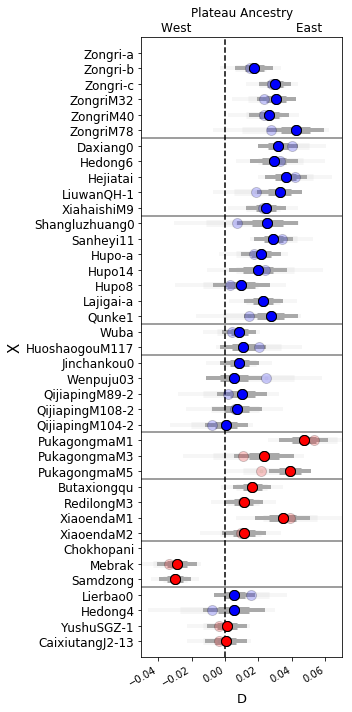

In [23]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13",
      ][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=atib
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.05]*len(mycombo)
myxmax=[0.07]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(5,10))

mynames=mycombo
myind="Zongri-a"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Chokhopani"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(0,3),(1,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[myind,[varypop],ypops,out]

    Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
    Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
    Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
    mylabel="Plateau Ancestry\n%s                           %s" % ("West","East") #mypops2[1][0],mypops2[0])

    #mylabel="P2 = %s" % mypops2[1][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("X",fontsize=15,rotation=90) #,rotation=90
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

xlabel [-0.02, 0.0, 0.02, 0.039999999999999994, 0.06, 0.08]


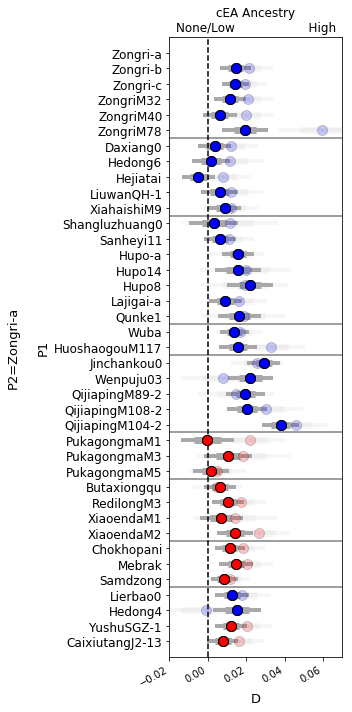

In [24]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13",
      ][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=atib
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.02]*len(mycombo)
myxmax=[0.07]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(5,10))

mynames=mycombo
myind="Zongri-a"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Han"] #,"Yi","Tu","Tibetan"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(1,3),(0,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[ypops,myind,[varypop],out]

    Zaryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z'))
    Daryall = np.transpose(pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D'))
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z'))
    Darytv = np.transpose(pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D'))
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)" % (mypops2[2],mypops2[1],'EA',mypops2[3])
    mylabel="P3 = %s" % mypops2[2][0]
    mylabel="cEA Ancestry\n%s                   %s" % ("None/Low","High") #mypops2[1][0],mypops2[0])

    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("P2=%s\n\nP1" % mypops2[1],rotation=90,fontsize=13)
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

xlabel [-0.04, -0.03, -0.02, -0.010000000000000002, 0.0, 0.010000000000000002, 0.019999999999999997, 0.030000000000000006, 0.04]


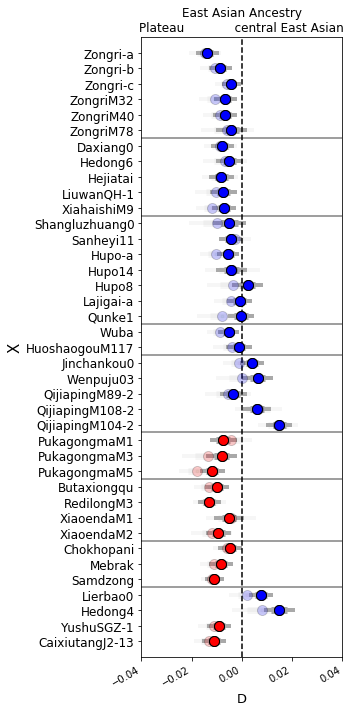

In [26]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13",
      ][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=atib
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.04]*len(mycombo)
myxmax=[0.04]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(5,10))

mynames=mycombo
myind="Han"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Tibetan_ChamdoX"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(0,3),(1,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[myind,[varypop],ypops,out]

    Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
    Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
    Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
    mylabel="East Asian Ancestry\n%s             %s" % ("Plateau","central East Asian") #mypops2[1][0],mypops2[0])

    #mylabel="P2 = %s" % mypops2[1][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("X",fontsize=15,rotation=90) #,rotation=90
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()

xlabel [-0.04, -0.03, -0.02, -0.010000000000000002, 0.0, 0.010000000000000002, 0.019999999999999997, 0.030000000000000006, 0.04]


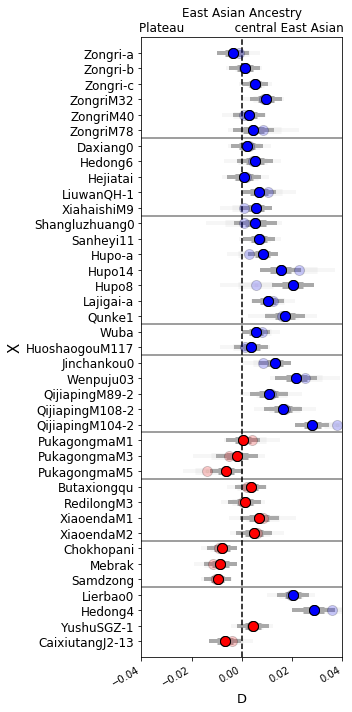

In [27]:
import numpy as np
import plateaumodules as pm
import matplotlib.pyplot as plt
import matplotlib
pD="/mnt/solexa/mel_yang/aPlateau/update051518/"
fhall="complete2.dstat.log"
fhtv="complete2.tv.dstat.log"
out,out2=("Mbuti","Mbuti")

atib=["Zongri-a","Zongri-b","Zongri-c","ZongriM32","ZongriM40","ZongriM78",
     "Daxiang0","Hedong6","Hejiatai","LiuwanQH-1","XiahaishiM9",
     "Shangluzhuang0","Sanheyi11","Hupo-a","Hupo14",
      "Hupo8","Lajigai-a","Qunke1",
      "Wuba","HuoshaogouM117",
      "Jinchankou0","Wenpuju03","QijiapingM89-2","QijiapingM108-2","QijiapingM104-2",
      "PukagongmaM1","PukagongmaM3","PukagongmaM5",
      "Butaxiongqu","RedilongM3","XiaoendaM1","XiaoendaM2",
      "Chokhopani","Mebrak","Samdzong",
      "Lierbao0","Hedong4","YushuSGZ-1","CaixiutangJ2-13",
      ][::-1]
agq=["Zongri-b","Zongri-c","ZongriM78","ZongriM40","ZongriM32","Zongri-a","Hejiatai",#"XiahaishiM22",
     "Hedong6","Daxiang0","LiuwanQH-1","XiahaishiM9","Sanheyi11", 
     "Shangluzhuang0","Wuba","HuoshaogouM117","Hupo-a","Hupo14",
     "Hupo8","Qunke1","Lajigai-a","Lierbao0","Hedong4","Wenpuju03","Jinchankou0",#"Lajigai2",
     "QijiapingM89-2","QijiapingM104-2","QijiapingM108-2",][::-1]
anx=["PukagongmaM1","PukagongmaM5","PukagongmaM3","YushuSGZ-1",#"PukagongmaM2",
     "RedilongM3","XiaoendaM1","XiaoendaM2","Butaxiongqu","CaixiutangJ2-13","Chokhopani","Mebrak","Samdzong"][::-1]

eas=["Oroqen","Hezhen","Daur","Xibo","Japanese","Korean","Han","She","Miao","Tujia",
    "Dai","Kinh","Lahu","Ami","Atayal","Naxi","Yi","Tu","Tibetan","Sherpa"]
tib=["Tibetan_ChamdoX","Tibetan_LhasaX","Tibetan_NagquX",
     "Tibetan_ShannanX","Tibetan_ShigatseX","Sherpa_ShigatseX"]

mycombo=atib
wantedcolors=["blue"]*len(mycombo)
myxmin=[-0.04]*len(mycombo)
myxmax=[0.04]*len(mycombo)

mysubplot=0
#fig = plt.figure(figsize=(10,5))
fig = plt.figure(figsize=(5,10))

mynames=mycombo
myind="Han"
varypops=["Han","Dai","Ami","Daur"] 
varypops=["Tibetan"] 
#varypops=["Naxi","Yi","Tu","Tibetan"]
#varypops=["Tibetan_NyingchiX","Tibetan_ChamdoX","Tibetan_ShannanX","Sherpa_ShigatseX"]
ypops=mycombo
mytuples=[(0,3),(1,2)]
for count,varypop in enumerate(varypops):

    #mypops2=[popA,myind,ypops,varypop]
    mypops2=[myind,[varypop],ypops,out]

    Zaryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'Z')
    Daryall = pm.mkDary(pD,fhall,mypops2,mytuples[0],mytuples[1],'D')
    SEaryall=Daryall/Zaryall 
    
    mynewpops2=mypops2[:-1]+[out2]
    Zarytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'Z')
    Darytv = pm.mkDary(pD,fhtv,mynewpops2,mytuples[0],mytuples[1],'D')
    SEarytv=Darytv/Zarytv
    
    mylabel="D(%s,%s;%s,%s)\n%s              %s" % (mypops2[0],mypops2[1][0],'X',mypops2[3],"West Plateau","East Plateau") #mypops2[1][0],mypops2[0])
    mylabel="East Asian Ancestry\n%s             %s" % ("Plateau","central East Asian") #mypops2[1][0],mypops2[0])

    #mylabel="P2 = %s" % mypops2[1][0]
    #print Daryall
    ax1=fig.add_subplot(1,len(varypops),count+1)
    for ind,i in enumerate(ypops):
        if i in anx: wantedcolors="red"
        else: wantedcolors="blue"
        ax1.errorbar(Darytv[0][ind],ind,xerr=SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Darytv[0][ind],ind,xerr=2*SEarytv[0][ind],color=wantedcolors,alpha=0.1,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Darytv[0][ind],ind,'.',alpha=0.05)

        ax1.errorbar(Daryall[0][ind],ind,xerr=SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=7)
        ax1.errorbar(Daryall[0][ind],ind,xerr=2*SEaryall[0][ind],color=wantedcolors,markeredgecolor="black",markersize=10,ecolor='darkgrey',fmt='o',capthick=0,linewidth=4)
        ax1.plot(Daryall[0][ind],ind,'.')
    myys = np.array(range(len(mynames)))
    ax1.set_yticks(myys)
    if count==0:
        #ax1.text("P2=%s\n" % myind,rotation=90,fontsize=16)
        ax1.set_ylabel("X",fontsize=15,rotation=90) #,rotation=90
        ax1.set_yticklabels(mynames,fontsize=12)
    else: 
         
        ax1.set_yticklabels(['']*(len(mynames)),fontsize=0.1)
    ax1.set_ylim(-1,len(mynames))
    ax1.set_xlim(myxmin[count],myxmax[count])
    xlabel = ax1.get_xticks().tolist()
    print 'xlabel',xlabel
    #ax1.set_xticklabels(xlabel,fontsize=12) #[""]+xlabel[1:]

    ax1.set_title(mylabel,fontsize=12)
    #ax1.text(0,len(mynames),mylabel,fontsize=13, horizontalalignment='center', verticalalignment='center',backgroundcolor="white")

    ax1.axvline(x=0, ls='dashed', c='black') #, backgroundcolor="white") 
    for myline in [3.5,6.5,10.5,13.5,18.5,20.5,27.5,32.5]:
        ax1.axhline(y=myline, ls='solid', c='black',alpha=0.5)

    ax1.set_xlabel("D",fontsize=13)
fig.autofmt_xdate()  
plt.tight_layout()
plt.subplots_adjust(wspace=0.001) 
plt.show()